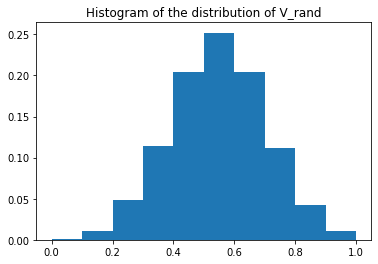

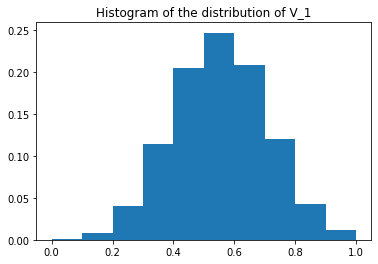

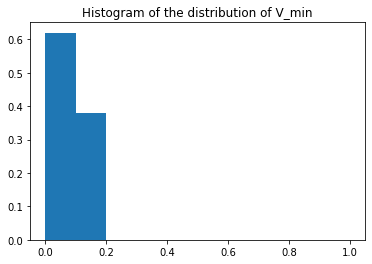

In [ ]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

bins = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

def coin(x=10):
  count = 0.0
  for i in range(x):
    count += random.getrandbits(1)
  
  return count / 10

def flip(times):
  rand_coin = 0
  minfrq_coin = 1.0
  first_coin = coin()
  rand_coin_index = random.randint(0, times - 1)
  if rand_coin_index == 0:
    rand_coin = first_coin
  if minfrq_coin > first_coin:
      minfrq_coin = first_coin
  for i in range(1, rand_coin_index):
    the_coin = coin()
    if minfrq_coin > the_coin:
      minfrq_coin = the_coin
  # Avoid unnecessary if statement in for loop
  the_coin = coin()
  if rand_coin_index != 0:
    rand_coin = the_coin
  if minfrq_coin > the_coin:
      minfrq_coin = the_coin
  for i in range(rand_coin_index + 1, times):
    the_coin = coin()
    if minfrq_coin > the_coin:
      minfrq_coin = the_coin
  
  return (first_coin, rand_coin, minfrq_coin)


def multi_run(exp_times, times):
  rand_coin_times = [0] * exp_times
  minfrq_times = [0] * exp_times
  first_coin_times = [0] * exp_times 

  for i in range(exp_times):
    f, r, m = flip(times)
    rand_coin_times[i] = r
    first_coin_times[i] = f
    minfrq_times[i] = m
  
  
  return (rand_coin_times, first_coin_times, minfrq_times)

def plot(nums):
  fig, axs = plt.subplots(1, sharey=True)
  weights = np.ones_like(nums)/float(len(nums))
  # We can set the number of bins with the `bins` kwarg
  axs.hist(nums, weights=weights, bins=bins)

  return fig, axs

def question_b():
  r, f, m = multi_run(10000, 1000)
  rf, rx = plot(r)
  ff, fx = plot(f)
  mf, mx = plot(m)
  template = "Histogram of the distribution of {}"
  rx.set_title(template.format("V_rand"))
  fx.set_title(template.format("V_1"))
  mx.set_title(template.format("V_min"))
  rf.show()
  ff.show()
  mf.show()

question_b()

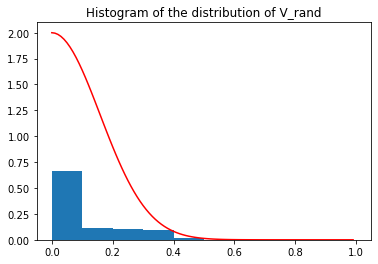

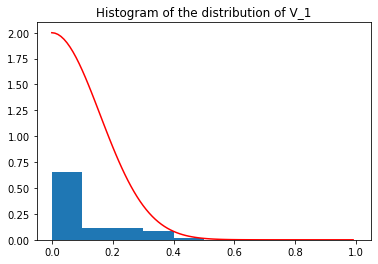

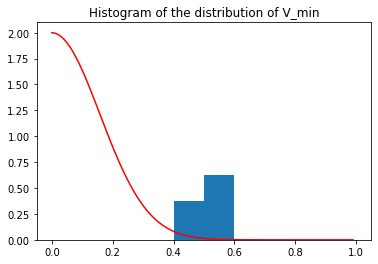

In [ ]:
import math

def question_c():
  r, f, m = multi_run(10000, 1000)
  r = np.absolute(np.array(r) - 0.5)
  f = np.absolute(np.array(f) - 0.5)
  m = np.absolute(np.array(m) - 0.5) 
  rf, rx = plot(r)
  ff, fx = plot(f)
  mf, mx = plot(m)
  ranges = np.arange(0, 1, 0.01)
  # Why 20?
  hoeffding_bound = [2 * np.power(math.e,-20*(x**2)) for x in ranges]   
  template = "Histogram of the distribution of {}"
  rx.plot(ranges,hoeffding_bound,"r-")
  fx.plot(ranges,hoeffding_bound,"r-")
  mx.plot(ranges,hoeffding_bound,"r-")
  rx.set_title(template.format("V_rand"))
  fx.set_title(template.format("V_1"))
  mx.set_title(template.format("V_min"))
  rf.show()
  ff.show()
  mf.show()

question_c()

[0.90234375, 0.700927734375, 0.700927734375, 0.700927734375, 0.700927734375, 0.700927734375, 0.700927734375, 0.700927734375, 0.700927734375, 0.700927734375, 0.700927734375, 0.700927734375, 0.700927734375, 0.700927734375, 0.700927734375, 0.700927734375, 0.700927734375, 0.234375, 0.234375, 0.234375, 0.234375, 0.234375, 0.234375, 0.234375, 0.234375, 0.234375, 0.234375, 0.234375, 0.234375, 0.234375, 0.234375, 0.234375, 0.234375, 0.234375, 0.031005859375, 0.031005859375, 0.031005859375, 0.031005859375, 0.031005859375, 0.031005859375, 0.031005859375, 0.031005859375, 0.031005859375, 0.031005859375, 0.031005859375, 0.031005859375, 0.031005859375, 0.031005859375, 0.031005859375, 0.031005859375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


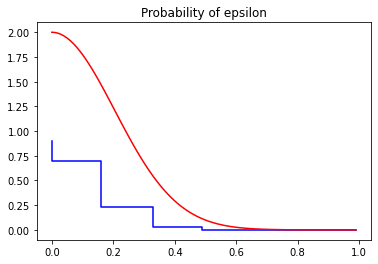

In [ ]:
# Problem 1.7
import operator as op
from functools import reduce

def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom  # or / in Python 2


def peq(ep):
  p = 0.0
  f = lambda k: ncr(6,k) / 64.0
  for i in range(int(3 + 6 * ep) + 1, 7):
    p += f(i)
  for i in range(0, int(3 - 6 * ep)):
    p += f(i)
  
  return 2 * p - (p * p)

def p17():
  fig, axs = plt.subplots(1, sharey=True)
  ranges = np.arange(0, 1, 0.01)
  hoeffding_bound = [2 * np.power(math.e,-12*(x**2)) for x in ranges]
  possible = [peq(x) for x in ranges]
  print(possible) 
  template = "Probability of epsilon"
  axs.set_title(template)
  axs.step(ranges, possible, "b")
  axs.plot(ranges, hoeffding_bound,"r-")
  fig.show()

p17()